# Importing Libaries

In [6]:
import numpy as np
import matplotlib.pyplot as plt


# Read and Explore Data

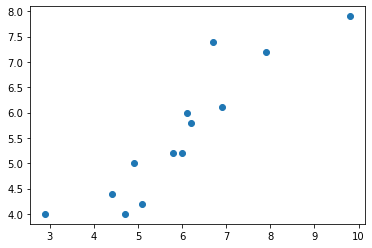

In [7]:
Data_points = np.genfromtxt("RegData.csv" ,  delimiter= ',')
X_Data = Data_points[:,0]
Y_Data = Data_points[:,1]

plt.scatter(X_Data , Y_Data)
plt.show()

# Batch GD
## Hypotysis Function : theta_0 X1 + theta_1 x2

In [8]:
feture = np.concatenate((np.ones(len(X_Data)).reshape( len(X_Data), 1) 
                         , X_Data.reshape(len(X_Data) , 1))  , axis = 1)

theta = np.array([0 , 0 ])
Y= np.dot(theta ,feture.T)
alpha = 0.001
Epoch = len(X_Data)


Jtheta = []
theta_zero = []
theta_one = []

for i in range(Epoch):
    theta_zero.append(theta[0])
    theta_one.append(theta[1])
    Y= np.dot(theta ,feture.T)
    Jtheta.append((alpha/2)*(np.sum(np.square(np.dot( (Y-Y_Data) , feture)) ,axis = 0)/Epoch))
    theta = theta - alpha*(np.sum(np.dot( (Y-Y_Data) , feture) ,axis = 0)/Epoch)
    

print(theta)

[0.39294693 0.39294693]


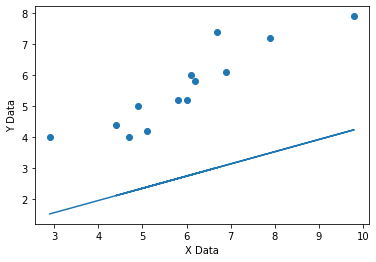

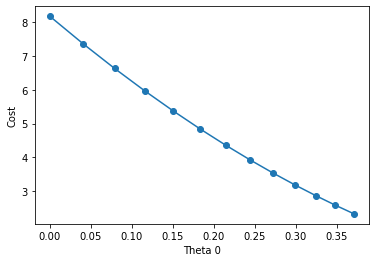

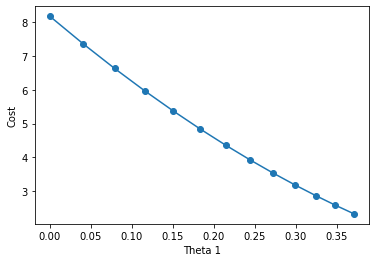

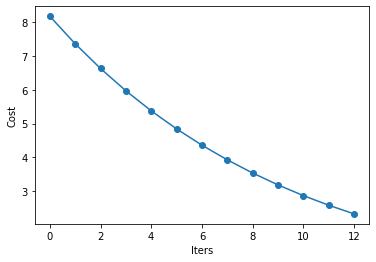

In [9]:
plt.scatter(X_Data , Y_Data)
plt.plot(X_Data, theta[0]+ X_Data * theta[1]) 
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.show()

plt.plot(theta_zero ,Jtheta ,'-o') 
plt.xlabel("Theta 0")
plt.ylabel("Cost")
plt.show()

plt.plot(theta_one , Jtheta , '-o')
plt.xlabel("Theta 1")
plt.ylabel("Cost")
plt.show()


plt.plot(np.arange(Epoch) , Jtheta , '-o')
plt.xlabel("Iters")
plt.ylabel("Cost")
plt.show()

# Batch GD With Stoping Condition

In [10]:
theta = np.array([0 , 0 ])
alpha = 0.001
Epoch = len(X_Data)
Jtheta = []
theta_zero = []
theta_one = []
Not_first_iter = 0
Max_no_iter = 50

for j in range(Max_no_iter):
    if Not_first_iter!=0 and np.abs(Jtheta[-1]-Jtheta[-2]) >0.1:
        break
    for i in range(Epoch):
        theta_zero.append(theta[0])
        theta_one.append(theta[1])
        Y= np.dot(theta ,feture.T)
        Jtheta.append((alpha/2)*(np.sum(np.square(np.dot( (Y-Y_Data) , feture)) ,axis = 0)/Epoch))
        theta = theta - alpha*(np.sum(np.dot( (Y-Y_Data) , feture) ,axis = 0)/Epoch)
        
print(theta)        

[0.79523135 0.79523135]


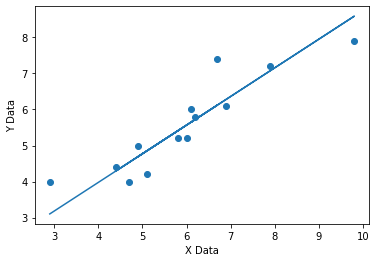

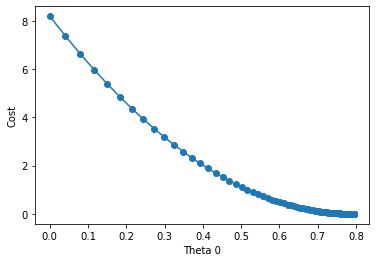

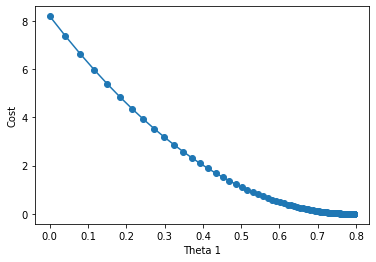

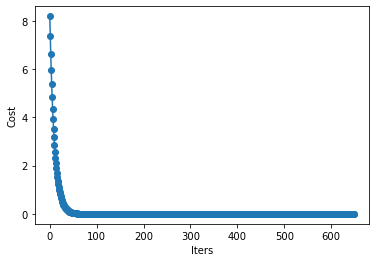

In [11]:
plt.scatter(X_Data , Y_Data)
plt.plot(X_Data, theta[0]+ X_Data * theta[1]) 
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.show()

plt.plot(theta_zero ,Jtheta ,'-o') 
plt.xlabel("Theta 0")
plt.ylabel("Cost")
plt.show()

plt.plot(theta_one , Jtheta , '-o')
plt.xlabel("Theta 1")
plt.ylabel("Cost")
plt.show()


plt.plot(np.arange(Epoch*Max_no_iter) , Jtheta , '-o')
plt.xlabel("Iters")
plt.ylabel("Cost")
plt.show()

## Stochastic GD

In [15]:
theta = np.array([0 , 0 ])
alpha = 0.001
Epoch = len(X_Data)

Not_first_iter = 0
Jtheta = []
theta = np.zeros(2)
theta_zero = []
theta_one = []
Max_no_iter = 50
for j in range(Max_no_iter):
   
    if Not_first_iter!=0 and np.abs(Jtheta[-1]-Jtheta[-2]) >0.1:
            break
    theta_zero.append(theta[0])
    theta_one.append(theta[1])
    for i in range(Epoch):
        Y= np.dot(theta ,feture[i].T)
        if i == Epoch-1:
            Jtheta.append((alpha/2)*(np.sum(np.square(np.dot( (Y-Y_Data[i]) , feture[i])) ,axis = 0)))
        theta = theta - alpha*(np.sum(np.dot( (Y-Y_Data[i]) , feture[i]) ,axis = 0))
        
print(theta)  

[0.78628189 0.78628189]


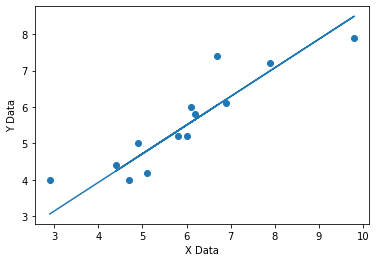

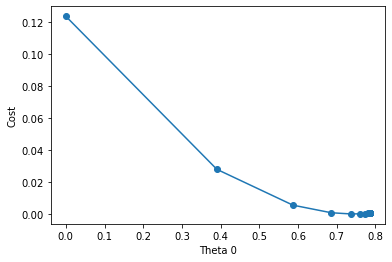

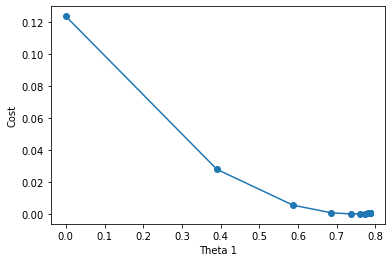

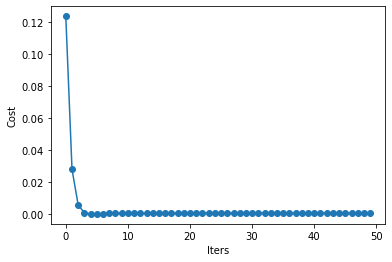

In [13]:
plt.scatter(X_Data , Y_Data)
plt.plot(X_Data, theta[0]+ X_Data * theta[1]) 
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.show()

plt.plot(theta_zero ,Jtheta ,'-o') 
plt.xlabel("Theta 0")
plt.ylabel("Cost")
plt.show()

plt.plot(theta_one , Jtheta , '-o')
plt.xlabel("Theta 1")
plt.ylabel("Cost")
plt.show()


plt.plot(np.arange(Max_no_iter) , Jtheta , '-o')
plt.xlabel("Iters")
plt.ylabel("Cost")
plt.show()

# Batch Momentum based

In [27]:
theta = np.array([0 , 0 ])
alpha = 0.001
Epoch = len(X_Data)

Not_first_iter = 0
Jtheta = []
theta = np.zeros(2)
theta_zero = []
theta_one = []
Max_no_iter = 10000
Gamma = 0.9
Vt = 0

    
for i in range(Max_no_iter):
    Y= np.dot(theta ,feture.T)
    if Not_first_iter >1 and np.abs(Jtheta[-1]-Jtheta[-2]) < 5e-9:
            break
    theta_zero.append(theta[0])
    theta_one.append(theta[1])
    Jtheta.append((alpha/2)*(np.sum(np.square(np.dot( (Y-Y_Data) , feture)) ,axis = 0)/Epoch))
    
    Vt = Gamma*Vt + alpha*(np.sum(np.dot( (Y-Y_Data) , feture) ,axis = 0)/Epoch)
    theta = theta - Vt
    Not_first_iter+=1
    
print(theta)      

[0.79507547 0.79507547]


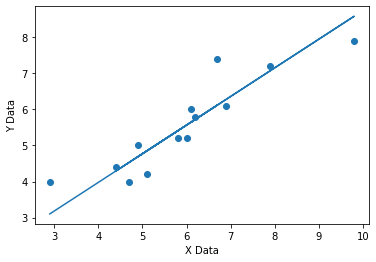

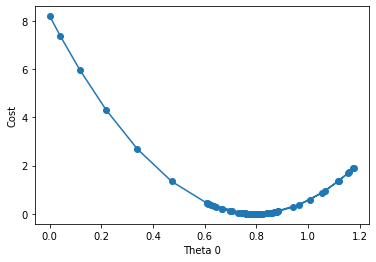

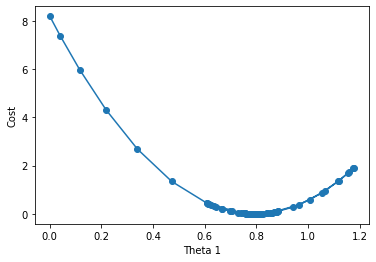

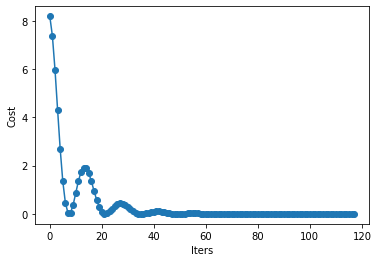

In [30]:
plt.scatter(X_Data , Y_Data)
plt.plot(X_Data, theta[0]+ X_Data * theta[1]) 
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.show()

plt.plot(theta_zero ,Jtheta ,'-o') 
plt.xlabel("Theta 0")
plt.ylabel("Cost")
plt.show()

plt.plot(theta_one , Jtheta , '-o')
plt.xlabel("Theta 1")
plt.ylabel("Cost")
plt.show()


plt.plot( Jtheta , '-o')
plt.xlabel("Iters")
plt.ylabel("Cost")
plt.show()

# NAG Algorithm (Batch Momentum based Improving)

In [31]:
theta = np.array([0 , 0 ])
alpha = 0.001
Epoch = len(X_Data)

Not_first_iter = 0
Jtheta = []
theta = np.zeros(2)
theta_zero = []
theta_one = []
Max_no_iter = 10000

Gamma = 0.09
Vt = 0
Theta_Tmp = 0
for i in range(Max_no_iter):
    Y= np.dot(theta ,feture.T)
#     if Not_first_iter >1 and np.abs(Jtheta[-1]-Jtheta[-2]) < 5e-9:
#             break
    theta_zero.append(theta[0])
    theta_one.append(theta[1])
    Jtheta.append((alpha/2)*(np.sum(np.square(np.dot( (Y-Y_Data) , feture)) ,axis = 0)/Epoch))
    
    Theta_Tmp = theta - Gamma*Vt
    theta = theta - alpha*(np.sum(np.dot( (Y-Y_Data) , feture) ,axis = 0)/Epoch)
    Vt = Gamma*Vt + alpha*(np.sum(np.dot( (Y-Y_Data) , feture) ,axis = 0)/Epoch)
    
print(theta)   



[0.79523135 0.79523135]


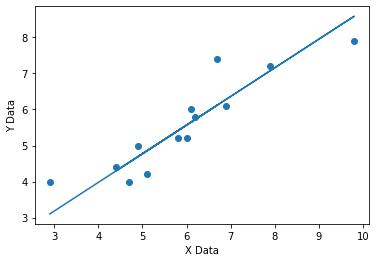

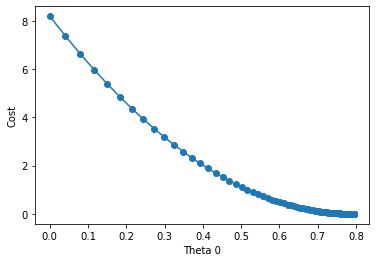

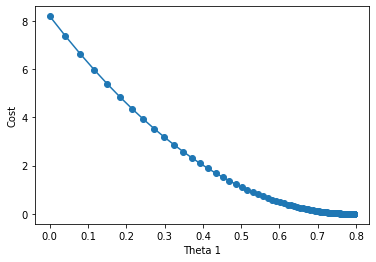

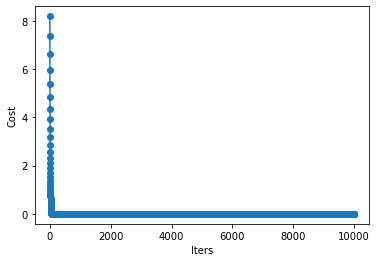

In [32]:
plt.scatter(X_Data , Y_Data)
plt.plot(X_Data, theta[0]+ X_Data * theta[1]) 
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.show()

plt.plot(theta_zero ,Jtheta ,'-o') 
plt.xlabel("Theta 0")
plt.ylabel("Cost")
plt.show()

plt.plot(theta_one , Jtheta , '-o')
plt.xlabel("Theta 1")
plt.ylabel("Cost")
plt.show()


plt.plot( Jtheta , '-o')
plt.xlabel("Iters")
plt.ylabel("Cost")
plt.show()

# Adagrad Algorithm

In [53]:
theta = np.array([0 , 0 ])
alpha = 0.001
Epoch = len(X_Data)

Not_first_iter = 0
Jtheta = []
theta = np.zeros(2)
theta_zero = []
theta_one = []
Max_no_iter = 10000

Vt = 0
epslon = 1e-8
for i in range(Max_no_iter):
    Y= np.dot(theta ,feture.T)
#     if Not_first_iter >1 and np.abs(Jtheta[-1]-Jtheta[-2]) < 5e-9:
#             break
    theta_zero.append(theta[0])
    theta_one.append(theta[1])
    Jtheta.append((alpha/2)*(np.sum(np.square(np.dot( (Y-Y_Data) , feture)) ,axis = 0)/Epoch))
    
    Vt = Vt + ((np.sum(np.dot( (Y-Y_Data) , feture) ,axis = 0)/Epoch))**2
    theta = theta - (alpha/np.sqrt(Vt*epslon))*(np.sum(np.dot( (Y-Y_Data) , feture) ,axis = 0)/Epoch)
    
    
print(theta)   

[0.79523135 0.79523135]


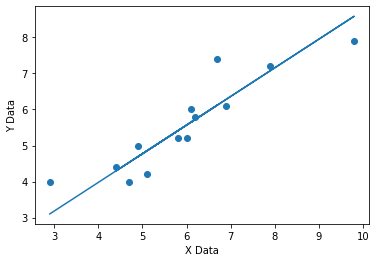

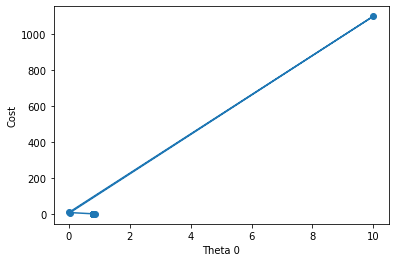

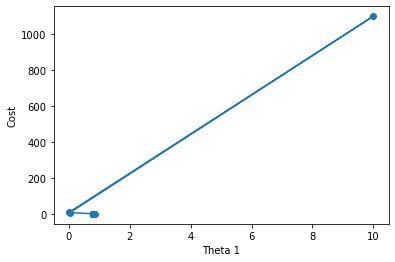

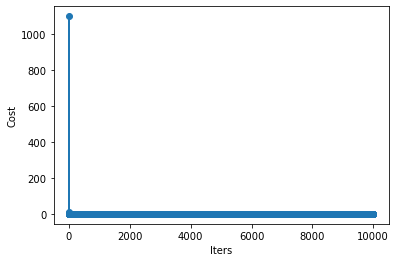

In [54]:
plt.scatter(X_Data , Y_Data)
plt.plot(X_Data, theta[0]+ X_Data * theta[1]) 
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.show()

plt.plot(theta_zero ,Jtheta ,'-o') 
plt.xlabel("Theta 0")
plt.ylabel("Cost")
plt.show()

plt.plot(theta_one , Jtheta , '-o')
plt.xlabel("Theta 1")
plt.ylabel("Cost")
plt.show()


plt.plot( Jtheta , '-o')
plt.xlabel("Iters")
plt.ylabel("Cost")
plt.show()

# RMSProp Algorithm

In [69]:
theta = np.array([0 , 0 ])
alpha = 0.0001
Epoch = len(X_Data)

Not_first_iter = 0
Jtheta = []
theta = np.zeros(2)
theta_zero = []
theta_one = []
Max_no_iter = 10

Vt = 0
epslon = 1e-8
Beta = 0.9
for i in range(Max_no_iter):
    Y= np.dot(theta ,feture.T)
#     if Not_first_iter >1 and np.abs(Jtheta[-1]-Jtheta[-2]) < 5e-9:
#         break
    theta_zero.append(theta[0])
    theta_one.append(theta[1])
    Jtheta.append((alpha/2)*(np.sum(np.square(np.dot( (Y-Y_Data) , feture)) ,axis = 0)/Epoch))
    
    Vt = Beta*Vt + (1-Beta)*((np.sum(np.dot( (Y-Y_Data) , feture) ,axis = 0)/Epoch))**2
    theta = theta - (alpha/np.sqrt(Vt*epslon))*(np.sum(np.dot( (Y-Y_Data) , feture) ,axis = 0)/Epoch)
    
    
print(theta)

[0.79123651 0.79123651]


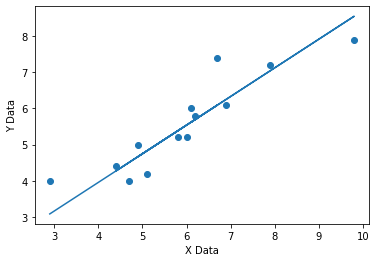

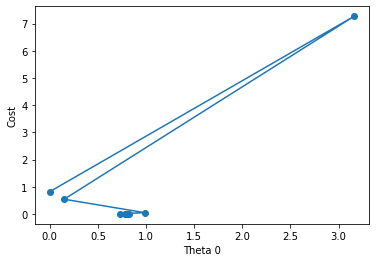

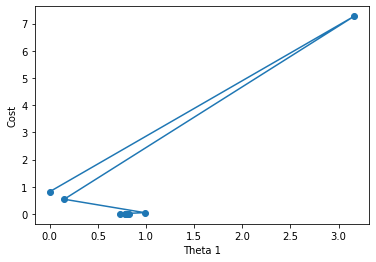

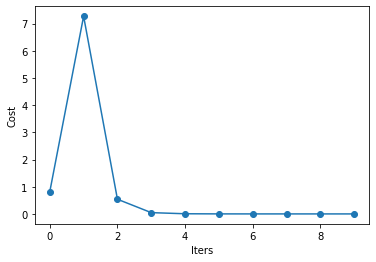

In [70]:
plt.scatter(X_Data , Y_Data)
plt.plot(X_Data, theta[0]+ X_Data * theta[1]) 
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.show()

plt.plot(theta_zero ,Jtheta ,'-o') 
plt.xlabel("Theta 0")
plt.ylabel("Cost")
plt.show()

plt.plot(theta_one , Jtheta , '-o')
plt.xlabel("Theta 1")
plt.ylabel("Cost")
plt.show()


plt.plot( Jtheta , '-o')
plt.xlabel("Iters")
plt.ylabel("Cost")
plt.show()

# Adam Algorithm

In [73]:
theta = np.array([0 , 0 ])
alpha = 0.0001
Epoch = len(X_Data)

Not_first_iter = 0
Jtheta = []
theta = np.zeros(2)
theta_zero = []
theta_one = []
Max_no_iter = 1000

Mt = 0
Vt = 0
Mt_hat = 0
Vt_hat = 0
epslon = 1e-8
Beta_1 = 0.2
Beta_2 = 0.9
for i in range(Max_no_iter):
    Y= np.dot(theta ,feture.T)
#     if Not_first_iter >1 and np.abs(Jtheta[-1]-Jtheta[-2]) < 5e-9:
#         break
    theta_zero.append(theta[0])
    theta_one.append(theta[1])
    Jtheta.append((alpha/2)*(np.sum(np.square(np.dot( (Y-Y_Data) , feture)) ,axis = 0)/Epoch))
    
    Mt = Beta_1*Mt + (1-Beta_1)*(np.sum(np.dot( (Y-Y_Data) , feture) ,axis = 0)/Epoch)
    Vt = Beta_2*Vt + (1-Beta_2)*((np.sum(np.dot( (Y-Y_Data) , feture) ,axis = 0)/Epoch))**2
    Mt_hat = Mt/(1-Beta_1)
    Vt_hat = Vt/(1-Beta_2)
    theta = theta - (alpha/np.sqrt(Vt_hat*epslon))*Mt_hat
    
    
print(theta) 



[0.79844436 0.79844436]


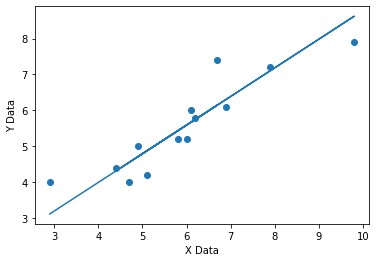

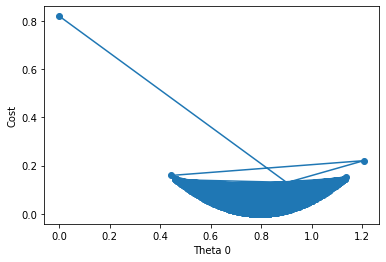

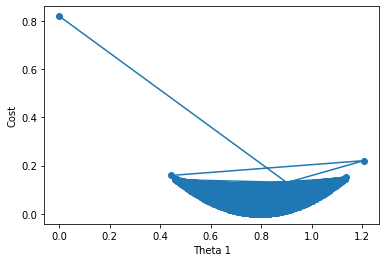

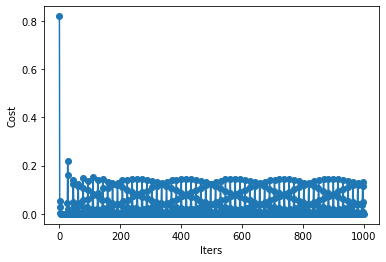

In [74]:
plt.scatter(X_Data , Y_Data)
plt.plot(X_Data, theta[0]+ X_Data * theta[1]) 
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.show()

plt.plot(theta_zero ,Jtheta ,'-o') 
plt.xlabel("Theta 0")
plt.ylabel("Cost")
plt.show()

plt.plot(theta_one , Jtheta , '-o')
plt.xlabel("Theta 1")
plt.ylabel("Cost")
plt.show()


plt.plot( Jtheta , '-o')
plt.xlabel("Iters")
plt.ylabel("Cost")
plt.show()